#Chest X-Ray Images (Pneumonia) -- Kaggle Problem

Installing data directly from kaggle into colab directory

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kaggleid123456789","key":"eb1365b93a0cb044c220167c5d8770c1"}'}

In [ ]:
 ! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 36.7MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.7MB/s]


In [ ]:
! mkdir chest_data

In [ ]:
! unzip chest-xray-pneumonia.zip -d chest_data

In [ ]:
import os
path=os.listdir('/content/chest_data/chest_xray/')
print(path)

['val', 'train', 'test', 'chest_xray', '__MACOSX']


Lets explore some images

-- PNEUMONIA

In [ ]:
import glob
import numpy as np
img = glob.glob("/content/chest_data/chest_xray/train/PNEUMONIA/*.jpeg")


In [ ]:
import matplotlib.pyplot as plt
train_img_Pneum = np.asarray(plt.imread(img[0]))

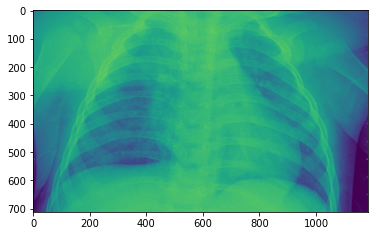

In [ ]:
plt.imshow(train_img_Pneum)

-- NORMAL

In [ ]:
img1=glob.glob("/content/chest_data/chest_xray/train/NORMAL/*.jpeg")
train_img_Norm=np.asarray(plt.imread(img1[0]))

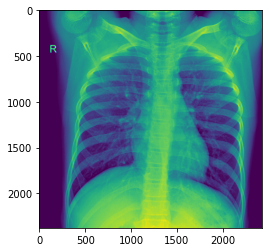

In [ ]:
plt.imshow(train_img_Norm)

Number of images in train dataset

In [ ]:
print(len(os.listdir('/content/chest_data/chest_xray/train/NORMAL')))
print(len(os.listdir('/content/chest_data/chest_xray/train/PNEUMONIA')))

1341
3875


In [ ]:
import keras

Data Augmentation

In [ ]:
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1/255,width_shift_range=0.1,zoom_range=0.2,horizontal_flip=True)
test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_gen=train_datagen.flow_from_directory('/content/chest_data/chest_xray/train',target_size=(64,64),class_mode='binary',batch_size=50)
test_gen=test_datagen.flow_from_directory('/content/chest_data/chest_xray/test',target_size=(64,64),class_mode='binary',batch_size=50)
val_gen=val_datagen.flow_from_directory('/content/chest_data/chest_xray/val',target_size=(64,64),class_mode='binary',batch_size=50)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Model building


In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3),padding='same'),
                               keras.layers.MaxPooling2D(),
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                               keras.layers.MaxPooling2D(),
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                               keras.layers.MaxPooling2D(),
                               keras.layers.Flatten(),
                               keras.layers.Dense(1000,activation='relu'),
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

**Model fitting**


In [ ]:
history=model.fit_generator(train_gen,epochs=10,verbose=1,validation_data=val_gen)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
105/105 [==============================] - 51s 483ms/step - loss: 0.4237 - accuracy: 0.8119 - val_loss: 0.3624 - val_accuracy: 0.8750
Epoch 2/10
105/105 [==============================] - 51s 490ms/step - loss: 0.2473 - accuracy: 0.8978 - val_loss: 0.4778 - val_accuracy: 0.8125
Epoch 3/10
105/105 [==============================] - 52s 494ms/step - loss: 0.1937 - accuracy: 0.9189 - val_loss: 0.5760 - val_accuracy: 0.7500
Epoch 4/10
105/105 [==============================] - 52s 491ms/step - loss: 0.1838 - accuracy: 0.9254 - val_loss: 0.4042 - val_accuracy: 0.7500
Epoch 5/10
105/105 [==============================] - 54s 516ms/step - loss: 0.1719 - accuracy: 0.9329 - val_loss: 0.4490 - val_accuracy: 0.6875
Epoch 6/10
105/105 [==============================] - 53s 506ms/step - loss: 0.1581 - accuracy: 0.9354 - val_loss: 0.5338 - val_accuracy: 0.7500
Epoch 7/10
105/105 [==============================] - 

**Evaluating model on test data**

In [ ]:
test_metrics=model.evaluate_generator(test_gen)
print(test_metrics)

Instructions for updating:
Please use Model.evaluate, which supports generators.
[0.33051377534866333, 0.8910256624221802]


**Plotting Accuracy and Loss**

Text(0.5, 1.0, 'Training and validation loss')

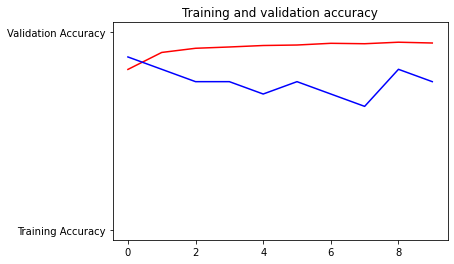

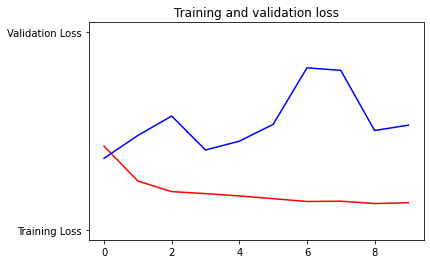

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend(['Train','Validation'], loc='upper left')

plt.title('Training and validation loss')

**Model fitting using different optimizer**

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit_generator(train_gen,epochs=10,verbose=1,validation_data=val_gen)

Epoch 1/10
105/105 [==============================] - 52s 492ms/step - loss: 0.1904 - accuracy: 0.9360 - val_loss: 1.0668 - val_accuracy: 0.6875
Epoch 2/10
105/105 [==============================] - 52s 491ms/step - loss: 0.1569 - accuracy: 0.9365 - val_loss: 1.2125 - val_accuracy: 0.6250
Epoch 3/10
105/105 [==============================] - 52s 496ms/step - loss: 0.1469 - accuracy: 0.9431 - val_loss: 0.3613 - val_accuracy: 0.8125
Epoch 4/10
105/105 [==============================] - 52s 496ms/step - loss: 0.1439 - accuracy: 0.9440 - val_loss: 0.4927 - val_accuracy: 0.6875
Epoch 5/10
105/105 [==============================] - 52s 494ms/step - loss: 0.1422 - accuracy: 0.9475 - val_loss: 0.4887 - val_accuracy: 0.8125
Epoch 6/10
105/105 [==============================] - 54s 513ms/step - loss: 0.1299 - accuracy: 0.9521 - val_loss: 0.2693 - val_accuracy: 0.8750
Epoch 7/10
105/105 [==============================] - 55s 521ms/step - loss: 0.1340 - accuracy: 0.9519 - val_loss: 0.7235 - val_ac

**Again evaluating on test data**

In [ ]:
test_metrics=model.evaluate_generator(test_gen)
print(test_metrics)

[0.33132338523864746, 0.9262820482254028]


**Plotting Accuracy and Loss**

Text(0.5, 1.0, 'Training and validation loss')

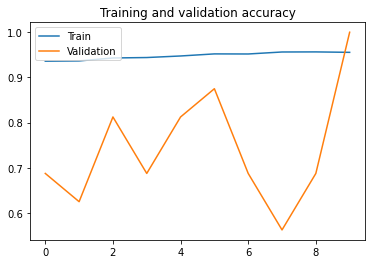

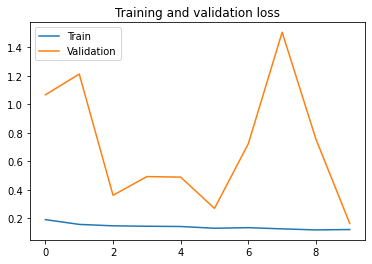

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['Train','Validation'], loc='upper left')

plt.title('Training and validation loss')

**Prediction on test data**

In [ ]:
Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_pred

Instructions for updating:
Please use Model.predict, which supports generators.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Test on random new image**

-- For NORMAL

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img2 = image.load_img(path, target_size=(64,64))
  x = image.img_to_array(img2)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a normal")
  else:
    print(fn + " is a pneumonia")

Saving images (1)-n.jfif to images (1)-n.jfif
[1.]
images (1)-n.jfif is a normal


**Test on random new image**

-- For PNEUMONIA

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img2 = image.load_img(path, target_size=(64,64))
  x = image.img_to_array(img2)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a normal")
  else:
    print(fn + " is a pneumonia")

Saving images-p.jfif to images-p.jfif
[0.]
images-p.jfif is a pneumonia
